In [437]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore")


# 1. Load the dataset into python environment


In [438]:
data=pd.read_csv(r'C:\Users\Zephyr\Documents\ICT Assignments and Casestudies\Casestudy#6\titanic_dataset.csv')

In [439]:
data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


# 2. Make ‘PassengerId’ as the index column

In [440]:
data=pd.read_csv(r'C:\Users\Zephyr\Documents\ICT Assignments and Casestudies\Casestudy#6\titanic_dataset.csv',
                 index_col='PassengerId')

In [441]:
data.head()

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
PassengerId,,,,,,,,,,,
1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


# 3. Check the basic details of the dataset

In [442]:
data.shape

(891, 11)

In [443]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 891 entries, 1 to 891
Data columns (total 11 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  891 non-null    int64  
 1   Pclass    891 non-null    int64  
 2   Name      891 non-null    object 
 3   Sex       891 non-null    object 
 4   Age       714 non-null    float64
 5   SibSp     891 non-null    int64  
 6   Parch     891 non-null    int64  
 7   Ticket    891 non-null    object 
 8   Fare      891 non-null    float64
 9   Cabin     204 non-null    object 
 10  Embarked  889 non-null    object 
dtypes: float64(2), int64(4), object(5)
memory usage: 83.5+ KB


In [444]:
data.isna().sum()

Survived      0
Pclass        0
Name          0
Sex           0
Age         177
SibSp         0
Parch         0
Ticket        0
Fare          0
Cabin       687
Embarked      2
dtype: int64

In [445]:
data.nunique()

Survived      2
Pclass        3
Name        891
Sex           2
Age          88
SibSp         7
Parch         7
Ticket      681
Fare        248
Cabin       147
Embarked      3
dtype: int64

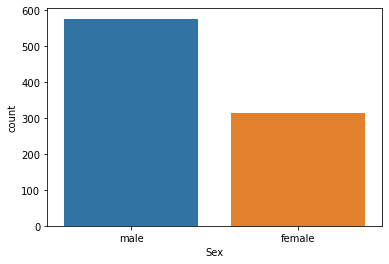

In [446]:
sns.countplot(data['Sex'])
plt.show()


There were more males aboard than Females on the Titanic.

# 4. Fill in all the missing values present in all the columns in the dataset

In [447]:
data.isna().mean()

Survived    0.000000
Pclass      0.000000
Name        0.000000
Sex         0.000000
Age         0.198653
SibSp       0.000000
Parch       0.000000
Ticket      0.000000
Fare        0.000000
Cabin       0.771044
Embarked    0.002245
dtype: float64

Approx. 20% of Age data is missing. We can use Median to fill it.

77% of Cabin data is missing, since such a high % of data is missing we can drop the Cabin column.

0.2% of data from Embarked is missing which can be filled using Mode.

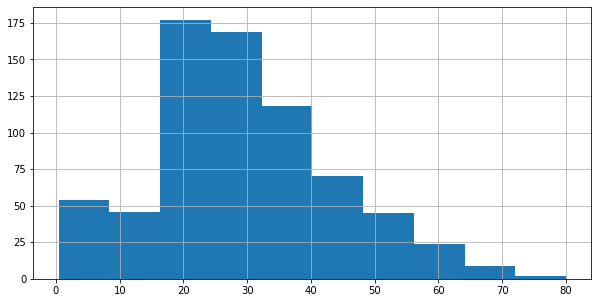

In [448]:
graph=data['Age']
graph.hist(figsize=(10,5))
plt.show()


The graph is skewed to the right hence we can use Median to fill in the values of age.

In [449]:
data['Age'].median()

28.0

In [450]:
# Filling in the missing Age values with Median
data['Age'].fillna(data['Age'].median(), inplace=True)

In [451]:
# Dropping the Cabin Column

data=data.drop(['Cabin'],axis=1)

In [452]:
# Finding the Mode
data['Embarked'].mode()

0    S
dtype: object

In [453]:
#Filling the missing data in Embarked with Mode

data['Embarked'].fillna('S',inplace=True)

In [454]:
data

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
PassengerId,,,,,,,,,,
1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S
2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C
3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S
4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S
5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S
...,...,...,...,...,...,...,...,...,...,...
887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,S
888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,S
889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,28.0,1,2,W./C. 6607,23.4500,S


In [455]:
data.isna().sum()

Survived    0
Pclass      0
Name        0
Sex         0
Age         0
SibSp       0
Parch       0
Ticket      0
Fare        0
Embarked    0
dtype: int64

Hence all the missing values have been taken care off.

# 5. Check and handle outliers in at least 3 columns in the dataset

Text(0.5, 1.0, 'Box plot of Fare charged')

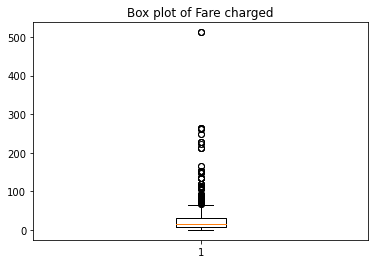

In [456]:
plt.boxplot(data['Fare'])
plt.title("Box plot of Fare charged")

There are outliers present here.

In [457]:
Q1= np.percentile(data['Fare'], 25,interpolation='midpoint')
Q2= np.percentile(data['Fare'], 50,interpolation='midpoint') 
Q3= np.percentile(data['Fare'], 75,interpolation='midpoint')

data['Fare'].median()
IQR= Q3-Q1
low_lim=Q1-1.5*IQR
up_lim=Q3+1.5*IQR

outlier=[]
for x in data['Fare']:
    if x<low_lim or x>up_lim:
        outlier.append(x)

In [458]:
print(low_lim)
print(up_lim)

-26.724
65.6344


In [459]:
outlier

[71.2833,
 263.0,
 146.5208,
 82.1708,
 76.7292,
 80.0,
 83.475,
 73.5,
 263.0,
 77.2875,
 247.5208,
 73.5,
 77.2875,
 79.2,
 66.6,
 69.55,
 69.55,
 146.5208,
 69.55,
 113.275,
 76.2917,
 90.0,
 83.475,
 90.0,
 79.2,
 86.5,
 512.3292,
 79.65,
 153.4625,
 135.6333,
 77.9583,
 78.85,
 91.0792,
 151.55,
 247.5208,
 151.55,
 110.8833,
 108.9,
 83.1583,
 262.375,
 164.8667,
 134.5,
 69.55,
 135.6333,
 153.4625,
 133.65,
 66.6,
 134.5,
 263.0,
 75.25,
 69.3,
 135.6333,
 82.1708,
 211.5,
 227.525,
 73.5,
 120.0,
 113.275,
 90.0,
 120.0,
 263.0,
 81.8583,
 89.1042,
 91.0792,
 90.0,
 78.2667,
 151.55,
 86.5,
 108.9,
 93.5,
 221.7792,
 106.425,
 71.0,
 106.425,
 110.8833,
 227.525,
 79.65,
 110.8833,
 79.65,
 79.2,
 78.2667,
 153.4625,
 77.9583,
 69.3,
 76.7292,
 73.5,
 113.275,
 133.65,
 73.5,
 512.3292,
 76.7292,
 211.3375,
 110.8833,
 227.525,
 151.55,
 227.525,
 211.3375,
 512.3292,
 78.85,
 262.375,
 71.0,
 86.5,
 120.0,
 77.9583,
 211.3375,
 79.2,
 69.55,
 120.0,
 93.5,
 80.0,
 83.1583,
 6

In [460]:
ind=data['Fare']>up_lim
ind1=data.loc[ind].index

In [461]:
ind1

Int64Index([  2,  28,  32,  35,  53,  62,  63,  73,  89, 103,
            ...
            793, 803, 821, 830, 836, 847, 850, 857, 864, 880],
           dtype='int64', name='PassengerId', length=116)

In [462]:
data.drop(ind1,inplace=True)

Text(0.5, 1.0, 'Box plot of Fare charged after handling Outliers')

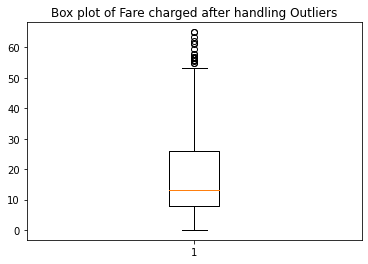

In [463]:
plt.boxplot(data['Fare'])
plt.title("Box plot of Fare charged after handling Outliers")

Text(0.5, 1.0, 'Box plot of Age')

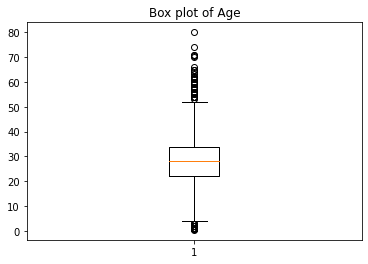

In [464]:
plt.boxplot(data['Age'])
plt.title("Box plot of Age")

Outliers are present here also

In [465]:
Q1= np.percentile(data['Age'], 25,interpolation='midpoint')
Q2= np.percentile(data['Age'], 50,interpolation='midpoint') 
Q3= np.percentile(data['Age'], 75,interpolation='midpoint')

data['Age'].median()
IQR= Q3-Q1
low_lim=Q1-1.5*IQR
up_lim=Q3+1.5*IQR

outlier=[]
for x in data['Age']:
    if x<low_lim or x>up_lim:
        outlier.append(x)

In [466]:
print(low_lim)
print(up_lim)

4.0
52.0


In [467]:
ind=(data['Age']>up_lim) | (data['Age']<low_lim)
ind1=data.loc[ind].index

In [468]:
ind1

Int64Index([  7,   8,  12,  16,  17,  34,  44,  55,  79,  95,  97, 117, 120,
            153, 165, 171, 173, 175, 184, 194, 206, 233, 250, 253, 262, 281,
            318, 327, 341, 349, 375, 382, 387, 408, 457, 468, 470, 480, 484,
            488, 493, 494, 514, 531, 546, 556, 571, 572, 583, 626, 627, 631,
            643, 645, 648, 673, 685, 695, 756, 773, 775, 789, 804, 825, 828,
            832, 852],
           dtype='int64', name='PassengerId')

In [469]:
data.drop(ind1,inplace=True)

Text(0.5, 1.0, 'Box plot of Age after removing Outliers')

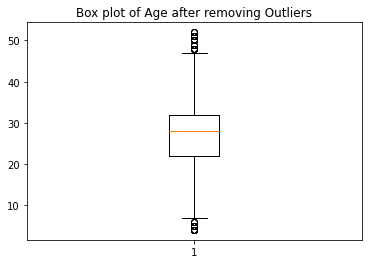

In [470]:
plt.boxplot(data['Age'])
plt.title("Box plot of Age after removing Outliers")

Text(0.5, 1.0, 'Box plot of Passenger Division Classes')

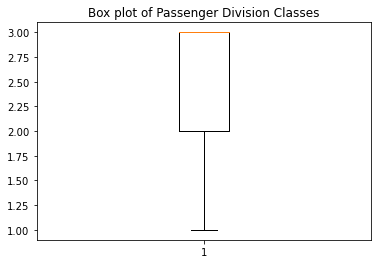

In [471]:
plt.boxplot(data['Pclass'])
plt.title("Box plot of Passenger Division Classes")

There are No Outliers present here!

# 6. Do min max scaling on the feature set (Take ‘Survived’ as target)


In [472]:
data.head()

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
PassengerId,,,,,,,,,,
1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S
3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S
4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S
5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S
6,0,3,"Moran, Mr. James",male,28.0,0,0,330877,8.4583,Q


In [473]:
#split the data
y = data['Survived']
x = data.drop(['Survived','Ticket','Embarked','Sex','Name'], axis=1)

#split it into train and test
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x,y, random_state=42, test_size=0.2)

#splitting is done. Now we need to create the linear model
from sklearn import linear_model
lr = linear_model.LinearRegression()
model = lr.fit(x_train, y_train)
predictions = model.predict(x_test)

#check the MSE of the model
from sklearn.metrics import mean_squared_error
print('MSE is :', mean_squared_error(y_test,predictions))

from sklearn.metrics import r2_score
print("R squared value is:", r2_score(y_test, predictions))

MSE is : 0.17991494767919933
R squared value is: 0.19596520279180496


PERFORMING MIN-MAX SCALING

In [474]:
x.describe()

,Pclass,Age,SibSp,Parch,Fare
count,708.000000,708.00000,708.000000,708.000000,708.000000
mean,2.518362,28.05226,0.399718,0.313559,17.135092
std,0.714332,9.50620,0.840859,0.782038,13.414455
min,1.000000,4.00000,0.000000,0.000000,0.000000
25%,2.000000,22.00000,0.000000,0.000000,7.879200
50%,3.000000,28.00000,0.000000,0.000000,11.241700
75%,3.000000,32.00000,1.000000,0.000000,25.496900
max,3.000000,52.00000,5.000000,6.000000,65.000000


In [475]:
type(x)

pandas.core.frame.DataFrame

In [476]:
from sklearn import preprocessing
min_max=preprocessing.MinMaxScaler(feature_range=(0,1))
x=min_max.fit_transform(x)


In [477]:
x=pd.DataFrame(x)

In [478]:
x.describe()

,0,1,2,3,4
count,708.000000,708.000000,708.000000,708.00000,708.000000
mean,0.759181,0.501089,0.079944,0.05226,0.263617
std,0.357166,0.198046,0.168172,0.13034,0.206376
min,0.000000,0.000000,0.000000,0.00000,0.000000
25%,0.500000,0.375000,0.000000,0.00000,0.121218
50%,1.000000,0.500000,0.000000,0.00000,0.172949
75%,1.000000,0.583333,0.200000,0.00000,0.392260
max,1.000000,1.000000,1.000000,1.00000,1.000000


In [479]:
x_train, x_test, y_train, y_test = train_test_split(x,y, random_state=42, test_size=0.2)
lr = linear_model.LinearRegression()
model = lr.fit(x_train, y_train)
predictions = model.predict(x_test)

print('MSE is :', mean_squared_error(y_test,predictions))

print("R squared value is:", r2_score(y_test, predictions))

MSE is : 0.1799149476791992
R squared value is: 0.19596520279180552


As we can observe there is no significant change in values after performing Min-Max Scaling.